In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
np.set_printoptions(suppress=True, precision=5)

In [171]:
@np.vectorize
def fβ(x, β):
    if 0 <= x <= 1/β:
        return β * x
    elif 1/β < x <= 1:
        return β * x - 1
    else:
        return 0
    
@np.vectorize
def gβ(x, β):
    if 0 <= x < 1/β:
        return β * x
    elif 1/β <= x <= 1:
        return β * x - 1
    else:
        return 0

In [172]:
beta = (1 + np.sqrt(5)) / 2
xrange = np.arange(0, 1, 1 / (200 * beta))

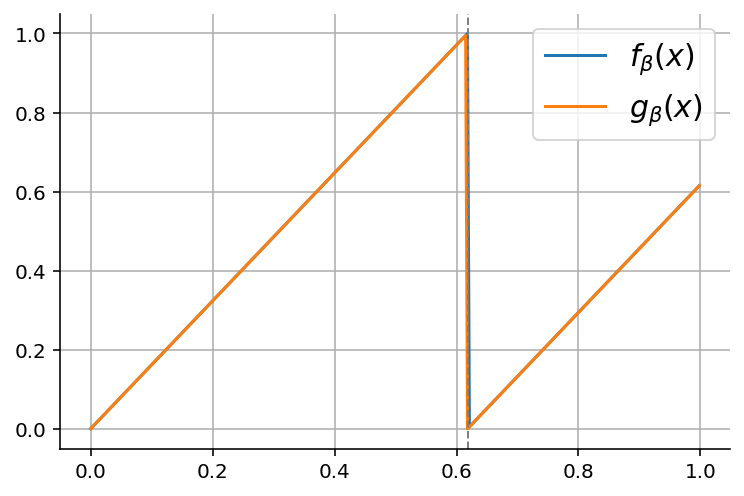

In [177]:
plt.plot(xrange, fβ(xrange, beta), label=r"$f_\beta(x)$")
plt.plot(xrange, gβ(xrange, beta), label=r"$g_\beta(x)$")
plt.legend(fontsize=15)
plt.axvline(x=1/beta, linewidth=1, linestyle="dashed", c="tab:gray")
plt.grid()

In [146]:
1 / beta

0.6180339887498948

In [147]:
evalp = np.array([
    [0, 1/beta], # I0
    [1/beta, 1]  # I1
])

In [148]:
fβ(evalp, beta)

array([[0.     , 1.     ],
       [1.     , 0.61803]])

In [149]:
gβ(evalp, beta)

array([[ 0.     , -0.     ],
       [-0.     ,  0.61803]])

In [162]:
A = np.array([
    [1, 1],
    [1, 0]
])

In [163]:
np.linalg.matrix_power(A, 2)

array([[2, 1],
       [1, 1]])

### Comparing interior points

#### $I_0$ values

In [152]:
# I0
step = 1 / (50 * beta)
xrange = np.arange(0, 1 / beta + step, step)

In [153]:
fβ(xrange, beta)

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ])

In [154]:
gβ(xrange, beta)

array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,
        0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,
        0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ,  0.52,
        0.54,  0.56,  0.58,  0.6 ,  0.62,  0.64,  0.66,  0.68,  0.7 ,
        0.72,  0.74,  0.76,  0.78,  0.8 ,  0.82,  0.84,  0.86,  0.88,
        0.9 ,  0.92,  0.94,  0.96,  0.98, -0.  ])

#### $I_1$ values

In [166]:
# I1
step = 1 / (50 * beta)
xrange = np.arange(1 / beta, 1 + step, step)

In [167]:
fβ(xrange, beta)

array([1.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.  ])

In [168]:
np.sort(fβ(xrange, beta))

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 1.  ])

In [157]:
np.sort(gβ(xrange, beta))

array([-0.  ,  0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,
        0.16,  0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,
        0.34,  0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ,
        0.52,  0.54,  0.56,  0.58,  0.6 ])